In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
feature_list = []
with open('data/spambase.names') as f:
    line = f.readline()
    while (len(line)>0):
        line = f.readline()
        if (not line.startswith(('|','\n',' ','1','\n'))) and (line.find(':')>0):
            feature_list.append(line[:line.find(':')])

In [3]:
df = pd.read_csv('data/spambase.data',sep=',', header=None, names=feature_list+['is_spam'])

In [4]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=1)

In [24]:
X_train = np.array(df_train.drop(columns='is_spam').values)
y_train = np.array(df_train['is_spam'])

In [29]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

[Text(0.5833333333333334, 0.9, 'x[52] <= 0.056\ngini = 0.478\nsamples = 3680\nvalue = [2224, 1456]'),
 Text(0.35714285714285715, 0.7, 'x[6] <= 0.055\ngini = 0.358\nsamples = 2768\nvalue = [2121, 647]'),
 Text(0.19047619047619047, 0.5, 'x[51] <= 0.378\ngini = 0.279\nsamples = 2515\nvalue = [2094, 421]'),
 Text(0.09523809523809523, 0.3, 'x[15] <= 0.2\ngini = 0.179\nsamples = 2179\nvalue = [1963, 216]'),
 Text(0.047619047619047616, 0.1, 'gini = 0.131\nsamples = 2006\nvalue = [1865, 141]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.491\nsamples = 173\nvalue = [98, 75]'),
 Text(0.2857142857142857, 0.3, 'x[56] <= 55.5\ngini = 0.476\nsamples = 336\nvalue = [131, 205]'),
 Text(0.23809523809523808, 0.1, 'gini = 0.418\nsamples = 148\nvalue = [104, 44]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.246\nsamples = 188\nvalue = [27, 161]'),
 Text(0.5238095238095238, 0.5, 'x[26] <= 0.14\ngini = 0.191\nsamples = 253\nvalue = [27, 226]'),
 Text(0.47619047619047616, 0.3, 'x[45] <= 0.115\ngini = 0.117\nsam

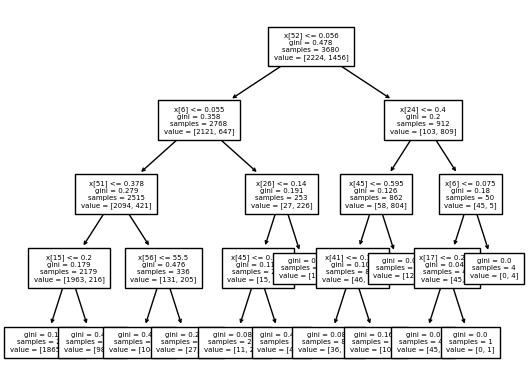

In [57]:
plot_tree(dtc, fontsize=5)

In [31]:
dtc.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20598024, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03472561, 0.        , 0.00161661, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05415331,
       0.        , 0.01661157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01346186, 0.        , 0.        , 0.        ,
       0.02120995, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.12561319, 0.48385294, 0.        , 0.        ,
       0.        , 0.04277472])

In [45]:
X_test = np.array(df_test.drop(columns='is_spam').values)
y_test = np.array(df_test['is_spam'])

In [46]:
y_train_pred = dtc.predict_proba(X_train)[:,1]
y_test_pred = dtc.predict_proba(X_test)[:,1]

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve

In [73]:
fpr, tpr, thd = roc_curve(y_train, y_train_pred)

In [74]:
roc_auc_score(y_train, y_train_pred)

0.9302832116175193

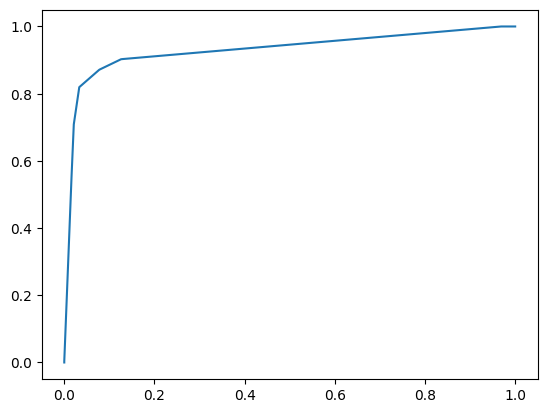

In [75]:
plt.plot(fpr, tpr)

In [76]:
# Want less non-spam emails to be classified as spam, while it's okay to classify spam email to non-spam
# Want high precision, can tolerate low recall
penalty = 10

In [78]:
idx = np.argmin(fpr*penalty+(1-tpr))
thd_v = thd[idx]

In [84]:
y_test_pred_01 = (y_test_pred > thd_v)

In [59]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_test, y_test_pred_01)

array([[554,  10],
       [170, 187]])

In [89]:
fpr = 10/(554+10)
tpr = 187/(187+10)

In [91]:
print(fpr, tpr)

0.01773049645390071 0.949238578680203


In [42]:
df = pd.read_csv('data/spam_ham_dataset.csv')

In [43]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [45]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=432)
X_train = list(df_train['text'])
y_train = np.array(df_train['label_num'])
X_test = list(df_test['text'])
y_test = np.array(df_test['label_num'])


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
CountVectorizer?

Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

Read more in the :ref:`User Guide <text_feature_extraction>`.

Parameters
----------
input : {'filename', 'file', 'content'}, default='content'
    - If `'filename'`, the sequ

In [54]:
cv = CountVectorizer(stop_words='english')

In [55]:
X_train = cv.fit_transform(X_train)

In [56]:
X_test = cv.transform(X_test)

In [59]:
vocab = cv.vocabulary_

# Naive Bayes clf

In [104]:
# Compute empirical prob for P(word | positive) and P(word | negative) for each word in vocab
e = 1e-2
pos_freq = ((X_train[y_train==1].sum(axis=0) + e) / (X_train[y_train==1].sum() + e*len(vocab))).reshape((-1,1))
neg_freq = ((X_train[y_train==0].sum(axis=0) + e) / (X_train[y_train==0].sum() + e*len(vocab))).reshape((-1,1))

In [105]:
pos_freq.shape

(44751, 1)

In [107]:
log_pos_prob_test = X_test @ pos_freq
log_neg_prob_test = X_test @ neg_freq

In [141]:
prob_pred = np.array((np.exp(log_pos_prob_test)/(np.exp(log_neg_prob_test)+np.exp(log_pos_prob_test)))).reshape(-1)

In [142]:
prob_pred

array([0.25180754, 0.50611799, 0.47421342, ..., 0.43628024, 0.49433957,
       0.47533567])

In [143]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [144]:
from matplotlib import pyplot as plt
import numpy as np

def compute_auc(pred, label):
    assert len(pred) == len(label), "pred and label array must have the same size!"
    idx = np.argsort(pred)
    n = len(pred)
    npos = sum(label)
    nneg = n - npos
    thd = [0.0]
    tpr = [1.0]
    fpr = [1.0]
    auc = 0
    
    for k in range(n):
        thd.append(pred[idx[k]])
        if label[idx[k]] == 1:
            tpr.append((tpr[-1]*npos-1)/npos)
            fpr.append(fpr[-1])
        else:
            tpr.append(tpr[-1])
            fpr.append((fpr[-1]*nneg-1)/nneg)
            auc += tpr[-1] * (1/nneg)
    plt.plot(fpr, tpr)
    plt.show()
    return thd, fpr, tpr, auc
            
        

In [145]:
prob_pred.shape

(1035,)

In [146]:
y_test.shape

(1035,)

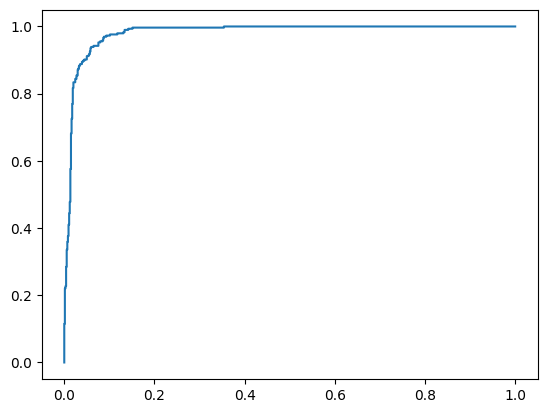

In [148]:
thd, fpr, tpr, auc = compute_auc(prob_pred, y_test)

In [149]:
auc

0.9810765002290377

In [196]:
p_thd = thd[np.where(np.array(fpr)<0.05)[0].min()]

In [198]:
p_thd

0.4968664558274338

In [197]:
((prob_pred>p_thd) == y_test).mean()

0.9371980676328503

In [199]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [200]:
confusion_matrix(y_test, (prob_pred>p_thd))

array([[704,  36],
       [ 29, 266]])

In [201]:
266/(266+36)

0.8807947019867549

In [202]:
precision_score(y_test, (prob_pred>p_thd))

0.8807947019867549

In [203]:
recall_score(y_test, (prob_pred>p_thd))

0.9016949152542373

In [204]:
36/740

0.04864864864864865

In [206]:
precision = np.array(tpr) * sum(y_test) / (np.array(tpr)*sum(y_test) + np.array(fpr)*(len(y_test) - sum(y_test)))

In [209]:
np.array(fpr)*(len(y_test) - sum(y_test))

array([7.40000000e+02, 7.39000000e+02, 7.38000000e+02, ...,
       1.47437618e-12, 1.47437618e-12, 1.47437618e-12])

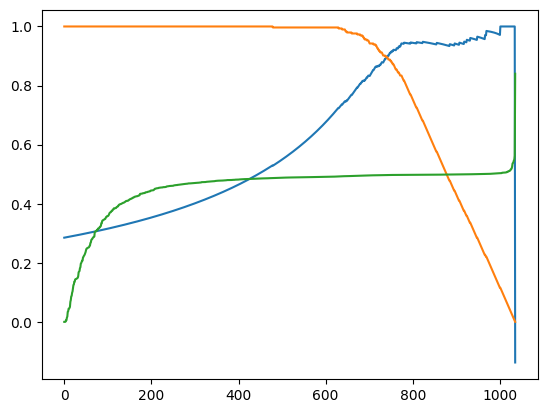

In [215]:
plt.plot(precision)
plt.plot(tpr)
plt.plot(thd)

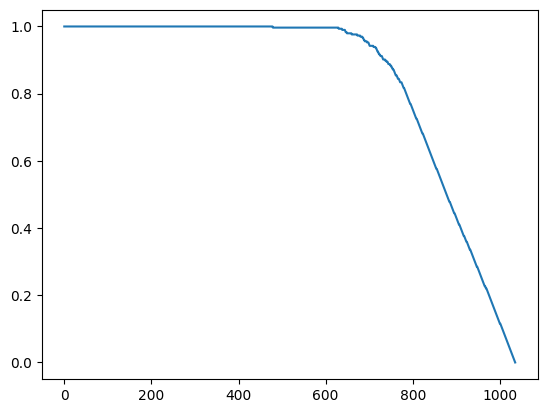